# 1. Introducción



Prediccion del talento futbolistico
"Es posible predecir el talento futbolistico apartir de los juegos del FIFA?"

hipotesis = "El juego del FIFA es una herramienta util para la deteccion del talento"

# 2. Descripción de los Datos
Los datos se componen de un archivo csv maleplayers.csv de 180021 filas x 109 columnas

Vamos a tratar de entender la estructura de los datos asi como sus faltantes y duplicados.

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import statistics

In [2]:
# guarda en variables los datasets y su fuente
futbol = pd.read_csv('data/male_players.csv')

C:\Users\aprai\AppData\Local\Temp\ipykernel_21960\367689262.py:2: DtypeWarning: Columns (108) have mixed types. Specify dtype option on import or set low_memory=False.
  futbol = pd.read_csv('data/male_players.csv')


In [3]:
futbol.head()

,player_id,player_url,fifa_version,fifa_update,update_as_of,short_name,long_name,player_positions,overall,potential,...,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk
0,231747,/player/231747/kylian-mbappe/240002,24.0,2.0,2023-09-22,K. Mbappé,Kylian Mbappé Lottin,"ST, LW",91,94,...,63+3,63+3,63+3,68+3,63+3,54+3,54+3,54+3,63+3,18+3
1,239085,/player/239085/erling-haaland/240002,24.0,2.0,2023-09-22,E. Haaland,Erling Braut Haaland,ST,91,94,...,63+3,63+3,63+3,62+3,60+3,62+3,62+3,62+3,60+3,19+3
2,192985,/player/192985/kevin-de-bruyne/240002,24.0,2.0,2023-09-22,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,...,80+3,80+3,80+3,79+3,75+3,70+3,70+3,70+3,75+3,21+3
3,158023,/player/158023/lionel-messi/240002,24.0,2.0,2023-09-22,L. Messi,Lionel Andrés Messi Cuccittini,"CF, CAM",90,90,...,63+3,63+3,63+3,64+3,59+3,49+3,49+3,49+3,59+3,19+3
4,165153,/player/165153/karim-benzema/240002,24.0,2.0,2023-09-22,K. Benzema,Karim Benzema,"CF, ST",90,90,...,64+3,64+3,64+3,64+3,60+3,55+3,55+3,55+3,60+3,18+3


In [4]:
futbol.describe()

,player_id,fifa_version,fifa_update,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,...,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed
count,180021.000000,180021.000000,180021.0,180021.000000,180021.000000,1.778680e+05,178173.00000,180021.000000,180021.000000,180021.000000,...,147133.000000,180021.000000,180021.000000,180021.000000,180021.000000,180021.000000,180021.000000,180021.000000,180021.000000,20024.000000
mean,217326.670294,19.621450,2.0,65.712711,70.779581,2.379142e+06,10638.01081,25.138689,181.287061,75.233356,...,57.837807,45.851456,47.759511,45.764783,16.509979,16.260136,16.129902,16.276951,16.615517,38.750300
std,35215.749284,2.838621,0.0,7.018104,6.255569,6.184358e+06,21637.41400,4.679389,6.764179,6.999181,...,12.305995,20.452502,21.309061,20.899683,17.661659,16.846583,16.499513,17.009393,17.971201,10.578237
min,2.000000,15.000000,2.0,40.000000,40.000000,1.000000e+03,500.00000,16.000000,154.000000,49.000000,...,3.000000,1.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000
25%,200759.000000,17.000000,2.0,61.000000,66.000000,3.250000e+05,2000.00000,21.000000,176.000000,70.000000,...,50.000000,26.000000,27.000000,25.000000,8.000000,8.000000,8.000000,8.000000,8.000000,30.000000
50%,222734.000000,20.000000,2.0,66.000000,71.000000,7.500000e+05,4000.00000,25.000000,181.000000,75.000000,...,59.000000,51.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000,40.000000
75%,239858.000000,22.000000,2.0,70.000000,75.000000,1.800000e+06,10000.00000,28.000000,186.000000,80.000000,...,66.000000,63.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000,46.000000
max,278145.000000,24.000000,2.0,94.000000,95.000000,1.940000e+08,575000.00000,54.000000,208.000000,110.000000,...,96.000000,94.000000,94.000000,95.000000,91.000000,92.000000,95.000000,92.000000,94.000000,68.000000


In [5]:
futbol.info(max_cols=1000)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180021 entries, 0 to 180020
Data columns (total 109 columns):
 #    Column                          Non-Null Count   Dtype  
---   ------                          --------------   -----  
 0    player_id                       180021 non-null  int64  
 1    player_url                      180021 non-null  object 
 2    fifa_version                    180021 non-null  float64
 3    fifa_update                     180021 non-null  float64
 4    update_as_of                    180021 non-null  object 
 5    short_name                      180021 non-null  object 
 6    long_name                       180021 non-null  object 
 7    player_positions                180021 non-null  object 
 8    overall                         180021 non-null  int64  
 9    potential                       180021 non-null  int64  
 10   value_eur                       177868 non-null  float64
 11   wage_eur                        178173 non-null  float64
 12   

RangeIndex: 180021 entries, 0 to 180020
Data columns (total 109 columns):
 #    Column                          Non-Null Count   Dtype  
---   ------                          --------------   -----  
 0    player_id                       180021 non-null  int64  
 1    player_url                      180021 non-null  object 
 2    fifa_version                    180021 non-null  float64
 3    fifa_update                     180021 non-null  float64
 4    update_as_of                    180021 non-null  object 
 5    short_name                      180021 non-null  object 
 6    long_name                       180021 non-null  object 
 7    player_positions                180021 non-null  object 
 8    overall                         180021 non-null  int64  
 9    potential                       180021 non-null  int64  
 10   value_eur                       177868 non-null  float64
 11   wage_eur                        178173 non-null  float64
 12   age                             180021 non-null  int64  
 13   dob                             180021 non-null  object 
 14   height_cm                       180021 non-null  int64  
 15   weight_kg                       180021 non-null  int64  
 16   club_team_id                    178156 non-null  float64
 17   club_name                       178156 non-null  object 
 18   league_id                       178156 non-null  float64
 19   league_name                     178156 non-null  object 
 20   league_level                    177771 non-null  float64
 21   club_position                   178156 non-null  object 
 22   club_jersey_number              178156 non-null  float64
 23   club_loaned_from                10723 non-null   object 
 24   club_joined_date                167433 non-null  object 
 25   club_contract_valid_until_year  178156 non-null  float64
 26   nationality_id                  180021 non-null  int64  
 27   nationality_name                180021 non-null  object 
 28   nation_team_id                  10098 non-null   float64
 29   nation_position                 10098 non-null   object 
 30   nation_jersey_number            10098 non-null   float64
 31   preferred_foot                  180021 non-null  object 
 32   weak_foot                       180021 non-null  int64  
 33   skill_moves                     180021 non-null  int64  
 34   international_reputation        180021 non-null  int64  
 35   work_rate                       180021 non-null  object 
 36   body_type                       180021 non-null  object 
 37   real_face                       180021 non-null  object 
 38   release_clause_eur              120722 non-null  float64
 39   player_tags                     13918 non-null   object 
 40   player_traits                   81805 non-null   object 
 41   pace                            159997 non-null  float64
 42   shooting                        159997 non-null  float64
 43   passing                         159997 non-null  float64
 44   dribbling                       159997 non-null  float64
 45   defending                       159997 non-null  float64
 46   physic                          159997 non-null  float64
 47   attacking_crossing              180021 non-null  int64  
 48   attacking_finishing             180021 non-null  int64  
 49   attacking_heading_accuracy      180021 non-null  int64  
 50   attacking_short_passing         180021 non-null  int64  
 51   attacking_volleys               180021 non-null  int64  
 52   skill_dribbling                 180021 non-null  int64  
 53   skill_curve                     180021 non-null  int64  
 54   skill_fk_accuracy               180021 non-null  int64  
 55   skill_long_passing              180021 non-null  int64  
 56   skill_ball_control              180021 non-null  int64  
 57   movement_acceleration           180021 non-null  int64  
 58   movement_sprint_speed           180021 non-null  int64  
 59   movement_agility                180021 non-null  int64  
 60   movement_reactions              180021 non-null  int64  
 61   movement_balance                180021 non-null  int64  
 62   power_shot_power                180021 non-null  int64  
 63   power_jumping                   180021 non-null  int64  
 64   power_stamina                   180021 non-null  int64  
 65   power_strength                  180021 non-null  int64  
 66   power_long_shots                180021 non-null  int64  
 67   mentality_aggression            180021 non-null  int64  
 68   mentality_interceptions         180021 non-null  int64  
 69   mentality_positioning           180021 non-null  int64  
 70   mentality_vision                180021 non-null  int64  
 71   mentality_penalties             180021 non-null  int64  
 72   mentality_composure             147133 non-null  float64
 73   defending_marking_awareness     180021 non-null  int64  
 74   defending_standing_tackle       180021 non-null  int64  
 75   defending_sliding_tackle        180021 non-null  int64  
 76   goalkeeping_diving              180021 non-null  int64  
 77   goalkeeping_handling            180021 non-null  int64  
 78   goalkeeping_kicking             180021 non-null  int64  
 79   goalkeeping_positioning         180021 non-null  int64  
 80   goalkeeping_reflexes            180021 non-null  int64  
 81   goalkeeping_speed               20024 non-null   float64
 82   ls                              180021 non-null  object 
 83   st                              180021 non-null  object 
 84   rs                              180021 non-null  object 
 85   lw                              180021 non-null  object 
 86   lf                              180021 non-null  object 
 87   cf                              180021 non-null  object 
 88   rf                              180021 non-null  object 
 89   rw                              180021 non-null  object 
 90   lam                             180021 non-null  object 
 91   cam                             180021 non-null  object 
 92   ram                             180021 non-null  object 
 93   lm                              180021 non-null  object 
 94   lcm                             180021 non-null  object 
 95   cm                              180021 non-null  object 
 96   rcm                             180021 non-null  object 
 97   rm                              180021 non-null  object 
 98   lwb                             180021 non-null  object 
 99   ldm                             180021 non-null  object 
 100  cdm                             180021 non-null  object 
 101  rdm                             180021 non-null  object 
 102  rwb                             180021 non-null  object 
 103  lb                              180021 non-null  object 
 104  lcb                             180021 non-null  object 
 105  cb                              180021 non-null  object 
 106  rcb                             180021 non-null  object 
 107  rb                              180021 non-null  object 
 108  gk                              180021 non-null  object

In [6]:
# miramos los valores que faltan
missing_values = futbol.isna().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
player_id       0
player_url      0
fifa_version    0
fifa_update     0
update_as_of    0
               ..
lcb             0
cb              0
rcb             0
rb              0
gk              0
Length: 109, dtype: int64


No nos muestra los valores nulos recurrimos a data wrangler para ver los valores nulos

In [7]:
print(futbol.isnull().sum())

player_id       0
player_url      0
fifa_version    0
fifa_update     0
update_as_of    0
               ..
lcb             0
cb              0
rcb             0
rb              0
gk              0
Length: 109, dtype: int64


In [8]:
futbol.nunique()

player_id        53111
player_url      180021
fifa_version        10
fifa_update          1
update_as_of        10
                 ...  
lcb                475
cb                 475
rcb                475
rb                 393
gk                 297
Length: 109, dtype: int64

In [9]:
print(futbol.shape)

(180021, 109)


In [10]:
futbol.dtypes

player_id         int64
player_url       object
fifa_version    float64
fifa_update     float64
update_as_of     object
                 ...   
lcb              object
cb               object
rcb              object
rb               object
gk               object
Length: 109, dtype: object

# 3. Limpieza de Datos
No se estiman acciones para la limpieza y tratamiento de datos que no sean la eliminacion de columnas innecesarias para el analisis del estudio.

In [11]:
futbol

,player_id,player_url,fifa_version,fifa_update,update_as_of,short_name,long_name,player_positions,overall,potential,...,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk
0,231747,/player/231747/kylian-mbappe/240002,24.0,2.0,2023-09-22,K. Mbappé,Kylian Mbappé Lottin,"ST, LW",91,94,...,63+3,63+3,63+3,68+3,63+3,54+3,54+3,54+3,63+3,18+3
1,239085,/player/239085/erling-haaland/240002,24.0,2.0,2023-09-22,E. Haaland,Erling Braut Haaland,ST,91,94,...,63+3,63+3,63+3,62+3,60+3,62+3,62+3,62+3,60+3,19+3
2,192985,/player/192985/kevin-de-bruyne/240002,24.0,2.0,2023-09-22,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,...,80+3,80+3,80+3,79+3,75+3,70+3,70+3,70+3,75+3,21+3
3,158023,/player/158023/lionel-messi/240002,24.0,2.0,2023-09-22,L. Messi,Lionel Andrés Messi Cuccittini,"CF, CAM",90,90,...,63+3,63+3,63+3,64+3,59+3,49+3,49+3,49+3,59+3,19+3
4,165153,/player/165153/karim-benzema/240002,24.0,2.0,2023-09-22,K. Benzema,Karim Benzema,"CF, ST",90,90,...,64+3,64+3,64+3,64+3,60+3,55+3,55+3,55+3,60+3,18+3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180016,220806,https://sofifa.com/player/220806/ellis-redman/...,15.0,2.0,2014-09-18,E. Redman,Ellis Redman,CB,41,61,...,38,38,38,37,40,41,41,41,40,10
180017,225509,https://sofifa.com/player/225509/aaron-collins...,15.0,2.0,2014-09-18,A. Collins,Aaron Graham John Collins,ST,41,50,...,30,30,30,31,32,31,31,31,32,14
180018,217591,https://sofifa.com/player/217591/piotr-zemlo/1...,15.0,2.0,2014-09-18,P. Żemło,Piotr Żemło,"LM, LB",40,50,...,46,46,46,48,51-1,53-3,53-3,53-3,51-1,12
180019,222947,https://sofifa.com/player/222947/tom-davies/15...,15.0,2.0,2014-09-18,T. Davies,Thomas Christopher Davies,CB,40,49,...,36,36,36,37,39,40,40,40,39,13


In [12]:
# Mirar filas repetidas
duplicates = futbol.duplicated().sum()
print("Number of duplicate rows:", duplicates)

Number of duplicate rows: 0


Seleccionamos las columnas que vamos a utilizar de un total de 109 nos quedamos con 26 que son las columnas que manejaremos.

In [13]:
futbol = futbol[['player_id', 
 # 'player_url',
 'fifa_version',
 #'fifa_update', 'update_as_of',
 'short_name',  #'long_name', 
 'player_positions', 'overall', 'potential', 'value_eur', 'wage_eur', 'age',
 # 'dob',  
 'height_cm', 'weight_kg', #'club_team_id',
 'club_name',
 #'league_id',
 'league_name', 'league_level', 'club_position',
 # 'club_jersey_number', 'club_loaned_from', 'club_joined_date', 'club_contract_valid_until_year', 'nationality_id',
 'nationality_name',
 # 'nation_team_id',
 'nation_position',
 # 'nation_jersey_number', 
 'preferred_foot', #'weak_foot', 'skill_moves',
 'international_reputation',
 # 'work_rate', 'body_type', 'real_face', 
 'release_clause_eur', 
 # 'player_tags', 'player_traits', 
 'pace', 
 'shooting',
 'passing', 'dribbling', 'defending', 'physic', #'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy',
 # 'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing',
 # 'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 'movement_reactions', 'movement_balance',
 # 'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots', 'mentality_aggression', 
 # 'mentality_interceptions', 'mentality_positioning',  'mentality_vision', 'mentality_penalties', 'mentality_composure',
 # 'defending_marking_awareness', 'defending_standing_tackle', 'defending_sliding_tackle', 'goalkeeping_diving', 'goalkeeping_handling',
 # 'goalkeeping_kicking', 'goalkeeping_positioning', 'goalkeeping_reflexes', 'goalkeeping_speed', 'ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf',
 # 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb', 'gk'
            ]].copy()

In [14]:
futbol.dtypes.count()

np.int64(26)

Miramos que los datos son suficientemente buenos para el analisis

In [15]:
futbol.isna().sum()

player_id                        0
fifa_version                     0
short_name                       0
player_positions                 0
overall                          0
potential                        0
value_eur                     2153
wage_eur                      1848
age                              0
height_cm                        0
weight_kg                        0
club_name                     1865
league_name                   1865
league_level                  2250
club_position                 1865
nationality_name                 0
nation_position             169923
preferred_foot                   0
international_reputation         0
release_clause_eur           59299
pace                         20024
shooting                     20024
passing                      20024
dribbling                    20024
defending                    20024
physic                       20024
dtype: int64

Observamos que faltan algunos valores pero afortunadamente los valores principàles a utilizar estan en su totalidad.
Buscamos jovenes talentos que no estan todavia consagrados por esto segmentamos en jovenes menores de 21 años con un overall de 70, potencial de 82 y con un valor menor a 1.800.000 euros.
Tomamos estas metricas a fin de identificar un numero significativo de individuos.


# 4. Análisis Univariado
Exploramos las distintas variables de forma individual.


In [16]:
promesas = ((futbol['potential'] >= 82) & (futbol['age'] <= 21) & (futbol['value_eur'] <= 1800000) & (futbol["overall"] >=70))
promesas_id = list(futbol.loc[promesas]['player_id'])
top_promesas = futbol[futbol['player_id'].isin(promesas_id)].sort_values(by = ['player_id', 'fifa_version']).copy()
top_promesas

,player_id,fifa_version,short_name,player_positions,overall,potential,value_eur,wage_eur,age,height_cm,...,nation_position,preferred_foot,international_reputation,release_clause_eur,pace,shooting,passing,dribbling,defending,physic
165754,192012,15.0,D. Reyes,CB,72,82,1800000.0,30000.0,21,189,...,NaN,Right,1,NaN,69.0,48.0,58.0,65.0,75.0,68.0
148445,192012,16.0,D. Reyes,CB,75,83,5500000.0,30000.0,22,189,...,LCB,Right,1,NaN,70.0,51.0,64.0,71.0,78.0,67.0
130272,192012,17.0,D. Reyes,"CB, CDM",78,84,10000000.0,20000.0,23,189,...,RCB,Right,2,NaN,68.0,46.0,59.0,74.0,80.0,70.0
112553,192012,18.0,D. Reyes,CB,77,82,10000000.0,10000.0,24,189,...,RCB,Right,3,20800000.0,65.0,45.0,62.0,70.0,78.0,68.0
94493,192012,19.0,D. Reyes,CB,77,82,NaN,NaN,25,189,...,SUB,Right,3,NaN,64.0,46.0,62.0,70.0,78.0,68.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79151,225863,20.0,O. Boscagli,"LB, CB",71,78,3000000.0,7000.0,21,181,...,NaN,Left,1,4800000.0,67.0,29.0,66.0,69.0,71.0,70.0
60104,225863,21.0,O. Boscagli,"LB, CB",71,75,2500000.0,9000.0,22,181,...,NaN,Left,1,4000000.0,66.0,29.0,65.0,69.0,70.0,70.0
38084,225863,22.0,O. Boscagli,"CB, LB, CDM",76,81,10000000.0,14000.0,23,181,...,NaN,Left,1,14800000.0,74.0,33.0,73.0,74.0,77.0,74.0
19231,225863,23.0,O. Boscagli,"CB, LB, CDM",77,82,14500000.0,15000.0,24,181,...,NaN,Left,2,21400000.0,73.0,49.0,74.0,74.0,77.0,75.0


Buscamos los nombres de las promesas que estamos tratando.

In [17]:
top_promesas["short_name"].unique()

array(['D. Reyes', 'N. Leali', 'M. Dæhli', 'E. Dier', 'J. Stones',
       'L. Andersen', 'J. Okore', 'K. Rekik', 'M. Livaja', 'N. Murru',
       'C. Chambers', 'S. Gnabry', 'W. Hughes', 'Filipe Augusto',
       'Z. Bakkali', 'Junior Malanda', 'João Cancelo', 'C. Mbemba',
       'P. Dybala', 'T. Werner', 'N. Süle', 'J. Brandt', 'Ivan Cavaleiro',
       'Alex Telles', 'N. Bentaleb', 'A. Halilović', 'S. Uçan',
       'S. Scuffet', 'O. Boscagli'], dtype=object)

Sacamos el histograma del overall para su analisis

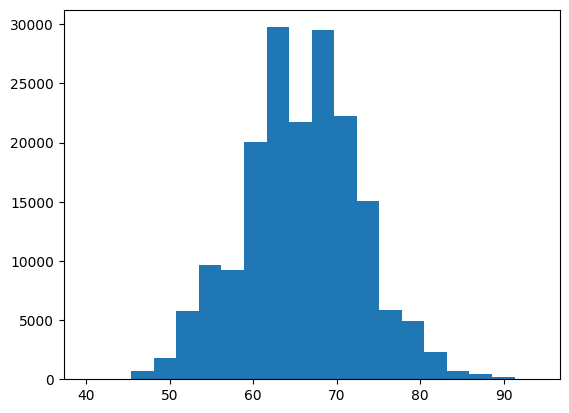

In [18]:
plt.hist(futbol['overall'], bins=20);

Sacamos el histograma del potencial para su analisis

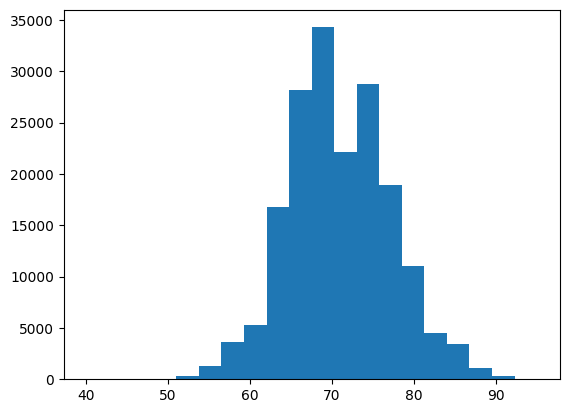

In [19]:
plt.hist(futbol['potential'], bins=20);

Sacamos el histograma del valor del jugador para su analisis

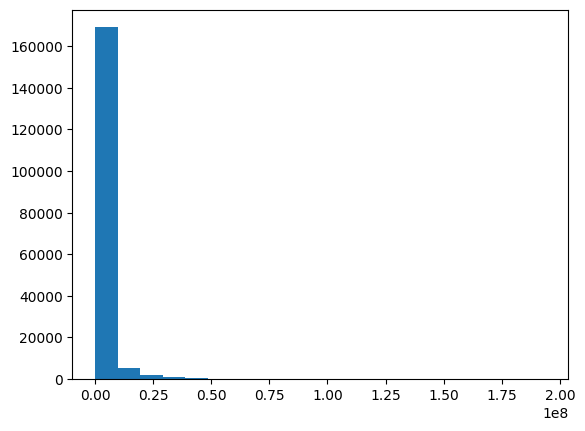

In [20]:
plt.hist(futbol['value_eur'], bins=20);

Sacamos el histograma del salario del jugador para su analisis

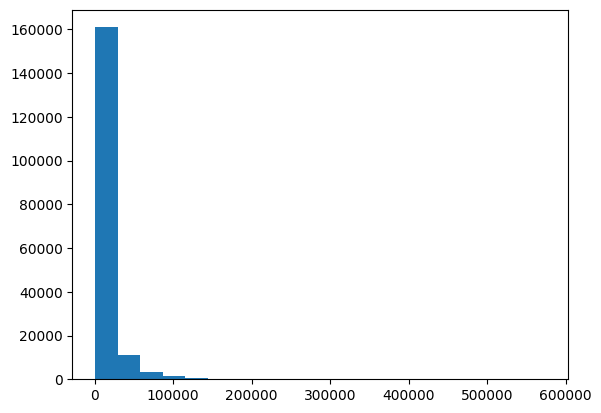

In [21]:
plt.hist(futbol['wage_eur'], bins=20);

Analizamos la dispersion de los salarios.

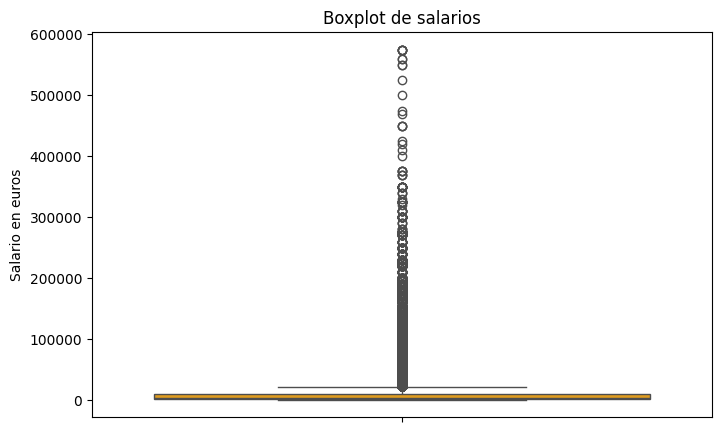

In [22]:
plt.figure(figsize=(8, 5))
sns.boxplot(y=futbol["wage_eur"], color="orange")
plt.title("Boxplot de salarios")
plt.ylabel("Salario en euros")
plt.show()

Sacamos el numero de jugadores promesas que son 29.

In [23]:
top_promesas['player_id'].value_counts().count()

np.int64(29)

# 5. Análisis Bivariado y Multivariado
Análizamos las relaciones entre dos o más variables.


Analisis del promedio de las promesas por version del FIFA

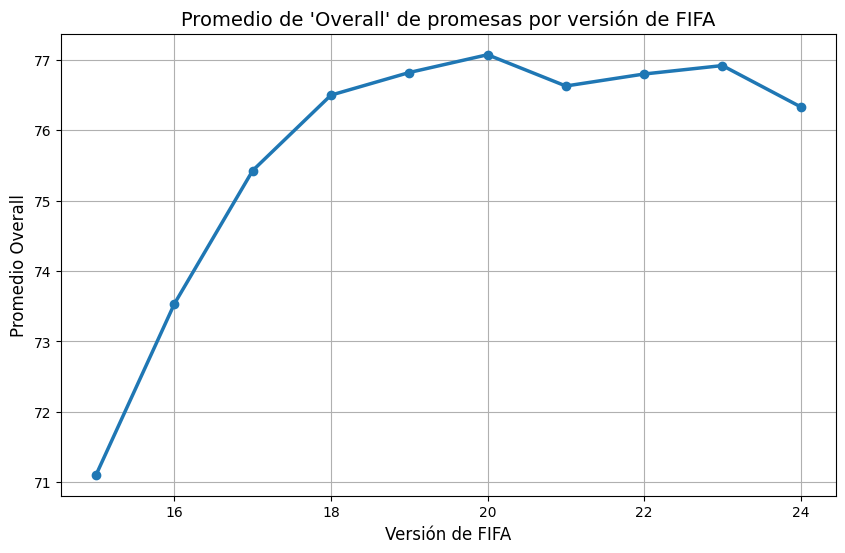

In [24]:
# Agrupar, calcular la media y graficar
ax = top_promesas.groupby("fifa_version")["overall"].mean().plot(
    kind="line", figsize=(10, 6), marker="o", linestyle="-", linewidth=2.5
)

# Mejorar etiquetas y título
ax.set_title("Promedio de 'Overall' de promesas por versión de FIFA", fontsize=14)
ax.set_xlabel("Versión de FIFA", fontsize=12)
ax.set_ylabel("Promedio Overall", fontsize=12)
ax.grid(True)

# Mostrar el gráfico
plt.show()

Sacamos el grafico del salario del jugador para jugadores FIFA y jugadores promesas para su analisis

Axes(0.125,0.11;0.775x0.77)


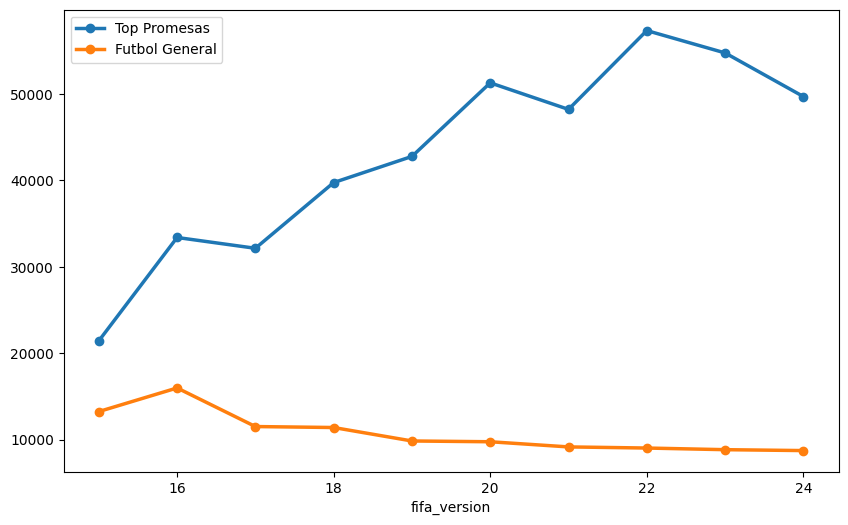

In [26]:
#Calculamos la media para ambos datasets
promesas_avg_wage = top_promesas.groupby("fifa_version")["wage_eur"].mean()
futbol_avg_wage = futbol.groupby("fifa_version")["wage_eur"].mean()

# Los unimos para su comparacion
comparison_df = pd.DataFrame({"Top Promesas": promesas_avg_wage, "Futbol General": futbol_avg_wage}).plot(
    kind="line", figsize=(10, 6), marker="o", linestyle="-", linewidth=2.5
)
ax.set_title("Promedio del salario de promesas y jugadores fifa por versión de FIFA", fontsize=14)
print(comparison_df)

Vemos que los salarios son netamente superiores para los jugadores promesas, aunque descienden los dos ultimos años.

Comparacion media overall de las promesas y los jugadores FIFA

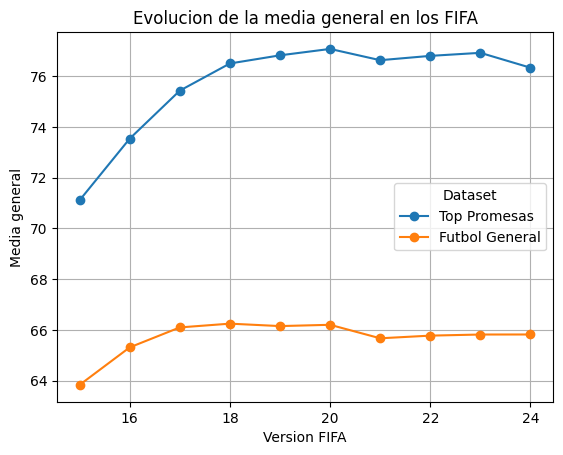

              Top Promesas  Futbol General
fifa_version                              
15.0             71.107143       63.828822
16.0             73.535714       65.308332
17.0             75.428571       66.095533
18.0             76.500000       66.244124
19.0             76.821429       66.148291
20.0             77.074074       66.198885
21.0             76.629630       65.666896
22.0             76.800000       65.772182
23.0             76.920000       65.815572
24.0             76.333333       65.817057


In [ ]:

# Seleccionamos los grupos necesarios
promesas_overall = top_promesas.groupby("fifa_version")["overall"].mean()
futbol_overall = futbol.groupby("fifa_version")["overall"].mean()

# Lo juntamos en un dataframe para su comparación
comparison_df = pd.DataFrame({"Top Promesas": promesas_overall, "Futbol General": futbol_overall})

# Visualizamos la comparacion
comparison_df.plot(kind="line", marker="o")
plt.xlabel("Version FIFA")
plt.ylabel("Media general")
plt.title("Evolucion de la media general en los FIFA")
plt.legend(title="Dataset")
plt.grid(True)
plt.show()


print(comparison_df)


La media progresa adecuadamente ascendiendo claramente frente a una linea mas llana de los fifa.

Comparacion media del potencial para las promesas y los jugadores FIFA

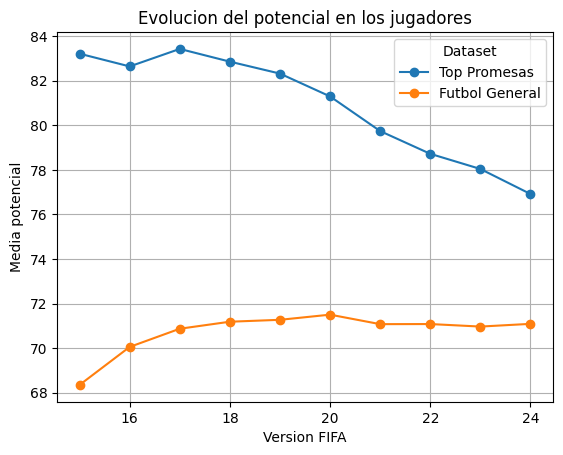

              Top Promesas  Futbol General
fifa_version                              
15.0             83.214286       68.347114
16.0             82.642857       70.052915
17.0             83.428571       70.869004
18.0             82.857143       71.184193
19.0             82.321429       71.269767
20.0             81.296296       71.500893
21.0             79.740741       71.074794
22.0             78.720000       71.079370
23.0             78.040000       70.966330
24.0             76.916667       71.088065


In [ ]:

promesas_overall = top_promesas.groupby("fifa_version")["potential"].mean()
futbol_overall = futbol.groupby("fifa_version")["potential"].mean()

comparison_df = pd.DataFrame({"Top Promesas": promesas_overall, "Futbol General": futbol_overall})

comparison_df.plot(kind="line", marker="o")
plt.xlabel("Version FIFA")
plt.ylabel("Media potencial")
plt.title("Evolucion del potencial en los jugadores")
plt.legend(title="Dataset")
plt.grid(True)
plt.show()

# Display the DataFrame
print(comparison_df)

El potencial de las promesas desciende aunque no asi sus salarios ya que tienen una correlacion negativa, su valor tambien desciende.

Tenemos 29 referencias que cumplian los requisitos de potencialidad.

Ahora miramos cuantos de esas referencias son realmente los jugadores quitando duplicados.

In [31]:
star_promesas = top_promesas[top_promesas['short_name'].duplicated() == False]
star_promesas.head(70)

,player_id,fifa_version,short_name,player_positions,overall,potential,value_eur,wage_eur,age,height_cm,...,nation_position,preferred_foot,international_reputation,release_clause_eur,pace,shooting,passing,dribbling,defending,physic
165754,192012,15.0,D. Reyes,CB,72,82,1800000.0,30000.0,21,189,...,NaN,Right,1,NaN,69.0,48.0,58.0,65.0,75.0,68.0
166197,201299,15.0,N. Leali,GK,71,82,1200000.0,20000.0,21,193,...,NaN,Right,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
166194,201877,15.0,M. Dæhli,"LM, RM, CAM",71,84,1200000.0,15000.0,19,177,...,RM,Right,1,NaN,79.0,52.0,68.0,76.0,23.0,44.0
165381,202335,15.0,E. Dier,"CB, RB",73,82,1800000.0,35000.0,20,191,...,NaN,Right,1,NaN,66.0,58.0,66.0,57.0,72.0,80.0
165372,203574,15.0,J. Stones,"CB, RB",73,83,1800000.0,25000.0,20,188,...,RB,Right,1,NaN,72.0,37.0,60.0,65.0,75.0,73.0
166198,203903,15.0,L. Andersen,"CAM, LW, RW",71,82,1400000.0,30000.0,19,184,...,NaN,Right,1,NaN,71.0,57.0,68.0,78.0,33.0,39.0
165382,204163,15.0,J. Okore,"CB, RB",73,82,1800000.0,30000.0,21,183,...,SUB,Right,1,NaN,81.0,40.0,45.0,49.0,70.0,83.0
165375,205193,15.0,K. Rekik,CB,73,83,1600000.0,45000.0,19,185,...,NaN,Left,1,NaN,73.0,38.0,54.0,60.0,72.0,76.0
166660,205855,15.0,M. Livaja,ST,70,82,1500000.0,25000.0,20,182,...,NaN,Right,1,NaN,69.0,68.0,51.0,68.0,28.0,68.0
166657,205934,15.0,N. Murru,LB,70,83,1000000.0,15000.0,19,180,...,NaN,Left,1,NaN,78.0,37.0,58.0,64.0,70.0,72.0


In [32]:
star_promesas['player_id'].value_counts().count()

np.int64(29)

Miramos donde estan ubicados los jugadores con mayor overall por franja de edad.

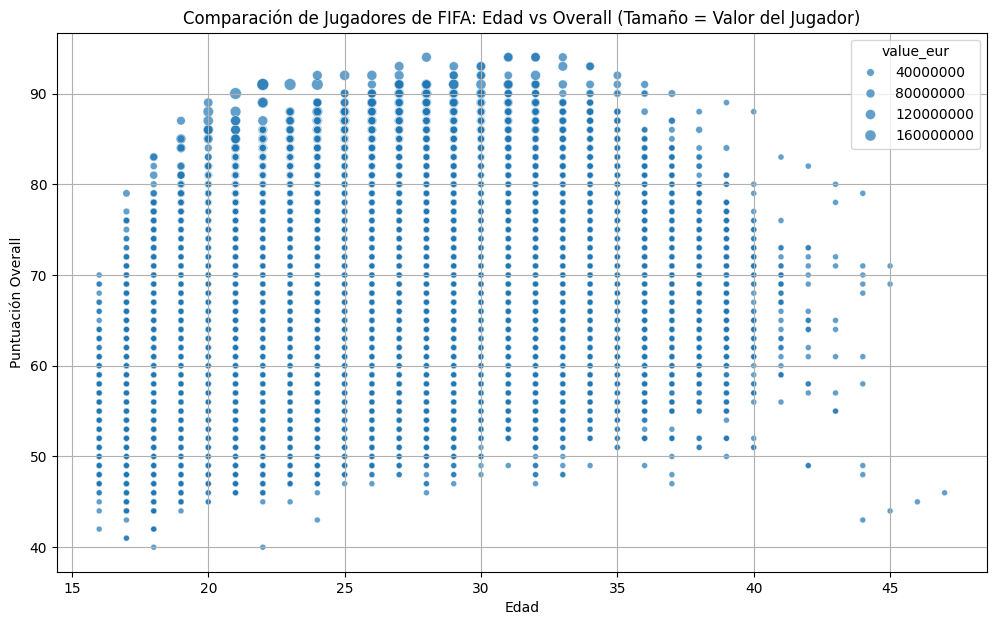

In [ ]:
# Visualización
plt.figure(figsize=(12,7))
sns.scatterplot(x=futbol["age"], y=futbol["overall"], size=futbol["value_eur"], alpha=0.7, legend=True)

# Personalizar gráfico
plt.xlabel("Edad")
plt.ylabel("Puntuación Overall")
plt.title("Comparación de Jugadores de FIFA: Edad vs Overall (Tamaño = Valor del Jugador)")
plt.grid(True)

plt.show()

Miramos tambien la potencialidad del jugador.

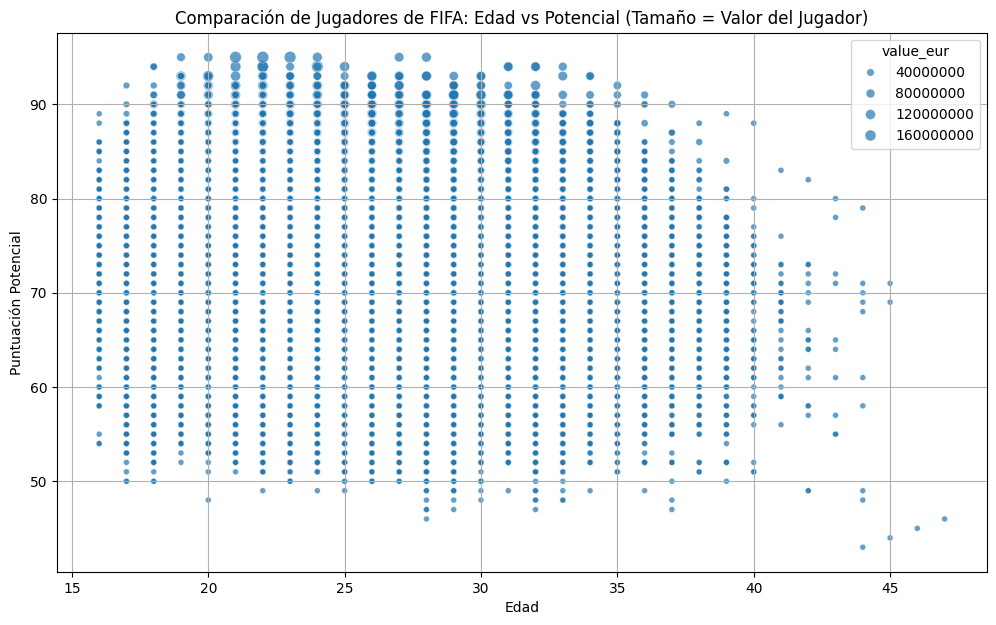

In [ ]:
# Visualización
plt.figure(figsize=(12,7))
sns.scatterplot(x=futbol["age"], y=futbol["potential"], size=futbol["value_eur"], alpha=0.7, legend=True)

# Personalizar gráfico
plt.xlabel("Edad")
plt.ylabel("Puntuación Potencial")
plt.title("Comparación de Jugadores de FIFA: Edad vs Potencial (Tamaño = Valor del Jugador)")
plt.grid(True)

plt.show()

Nos preparamos para el analisis de correlaciones tanto desde el punto de vista de variables principales como técnicas.

In [35]:
correlacion_futbol = futbol[["overall", "potential", "value_eur", "wage_eur", "age", "height_cm", "weight_kg"]]
correlacion_futbol_tecnica_fifa= futbol[["overall", "potential", "passing", "dribbling", "defending", "shooting", "pace","physic"]]


In [36]:
correlacion_star_promesas = star_promesas[["overall", "potential", "value_eur", "wage_eur", "age", "height_cm", "weight_kg"]]
correlacion_futbol_tecnica_promesas =star_promesas[["overall", "potential", "passing", "dribbling", "defending", "shooting", "pace","physic"]]

Sacamos una matriz de correlacion de futbol FIFA para el analisis de sus variables.

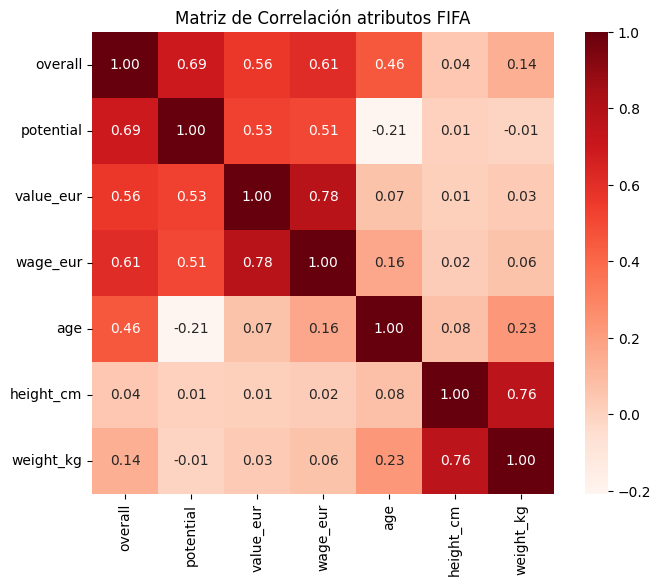

In [37]:
# Calcular la matriz de correlación
correlation_matrix = correlacion_futbol.corr()

# Crear gráfica de matriz de correlación con Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='Reds', fmt='.2f', square=True)
plt.title('Matriz de Correlación atributos FIFA')
plt.show()

Obtenemos los nombres de los 29 jugadores junto a su potencial

C:\Users\aprai\AppData\Local\Temp\ipykernel_24596\4207170815.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='short_name', y='potential', data=star_promesas, palette="pastel")


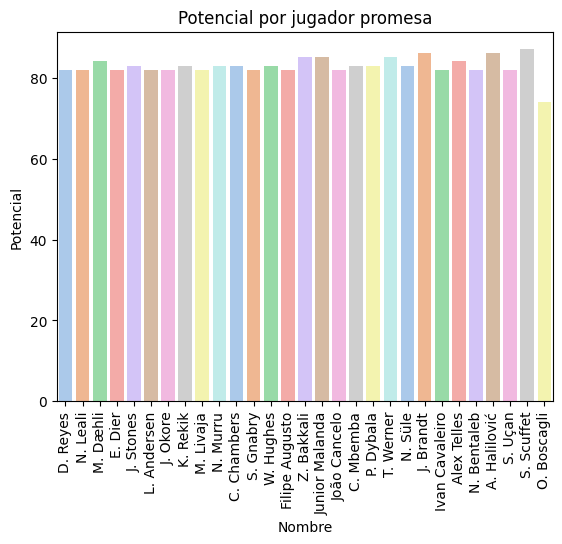

In [57]:
# Crear un gráfico de barras
sns.barplot(x='short_name', y='potential', data=star_promesas, palette="pastel")

# Personalizar el gráfico
plt.title('Potencial por jugador promesa')
plt.xlabel('Nombre')
plt.ylabel('Potencial')

# Inclinar las etiquetas del eje x
plt.xticks(rotation=90)  # Ajusta el ángulo a 90 grados
# Mostrar el gráfico
plt.show()

Obtenemos el overall de los jugadores.

C:\Users\aprai\AppData\Local\Temp\ipykernel_24596\3242186597.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='short_name', y='overall', data=star_promesas, palette="pastel")


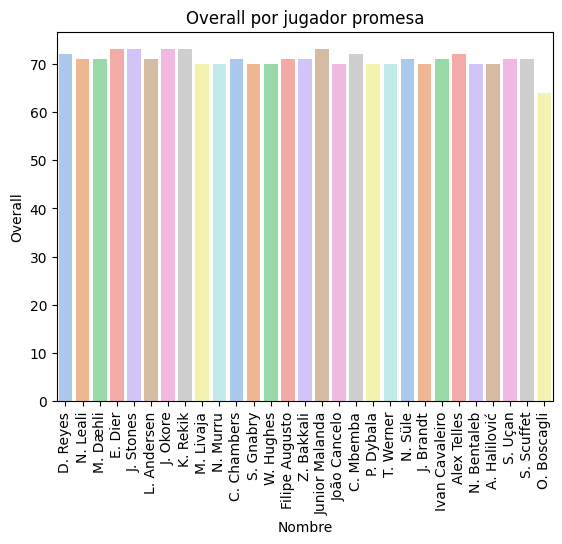

In [58]:
# Crear un gráfico de barras
sns.barplot(x='short_name', y='overall', data=star_promesas, palette="pastel")

# Personalizar el gráfico
plt.title('Overall por jugador promesa')
plt.xlabel('Nombre')
plt.ylabel('Overall')

# Inclinar las etiquetas del eje x
plt.xticks(rotation=90)  # Ajusta el ángulo a 90 grados
# Mostrar el gráfico
plt.show()

Obtenemos su pierna preferida por promesa.

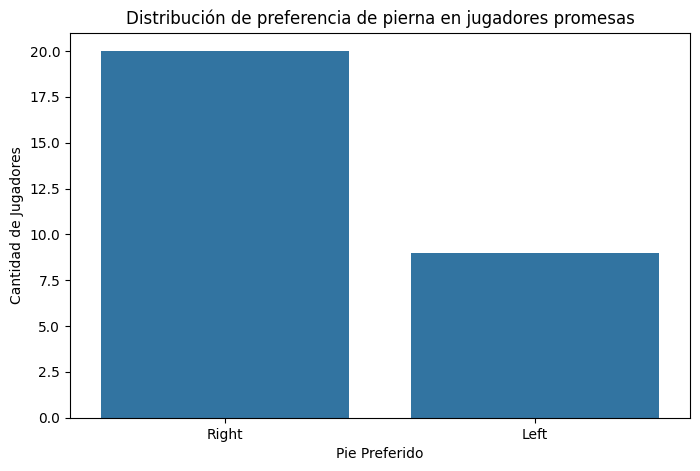

In [59]:
# Contar la frecuencia de cada preferencia de pie
foot_counts = star_promesas['preferred_foot'].value_counts()

# Graficar con Seaborn
plt.figure(figsize=(8,5))
sns.barplot(x=foot_counts.index, y=foot_counts.values)
plt.xlabel("Pie Preferido")
plt.ylabel("Cantidad de Jugadores")
plt.title("Distribución de preferencia de pierna en jugadores promesas")
plt.show()

Obtenemos la media del overall y el potencial para cada jugador.

In [41]:
resultado = top_promesas.groupby('short_name')[['overall','potential']].mean().round(1)
resultado


,overall,potential
short_name,,
A. Halilović,73.2,81.1
Alex Telles,79.8,83.0
C. Chambers,73.9,80.0
C. Mbemba,76.3,81.1
D. Reyes,74.2,79.2
E. Dier,78.0,82.4
Filipe Augusto,73.0,77.8
Ivan Cavaleiro,73.8,77.7
J. Brandt,80.0,86.9


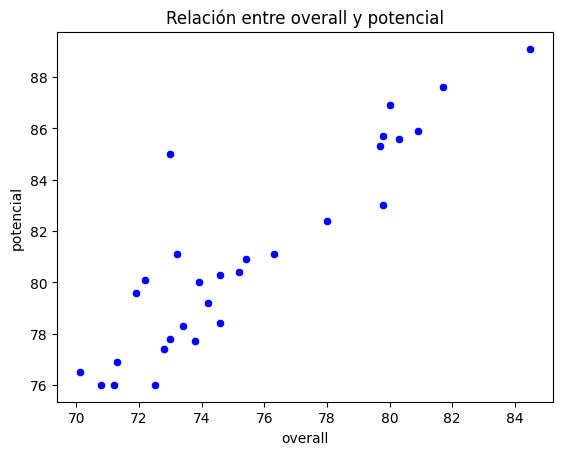

In [42]:
# Crear un scatterplot con Seaborn
sns.scatterplot(x='overall', y='potential', data=resultado, color='blue', marker='o',)

# Personalizar el gráfico
plt.title('Relación entre overall y potencial')
plt.xlabel('overall')
plt.ylabel('potencial')

# Mostrar el gráfico
plt.show()

Miramos la relacion entre el overall y la liga.

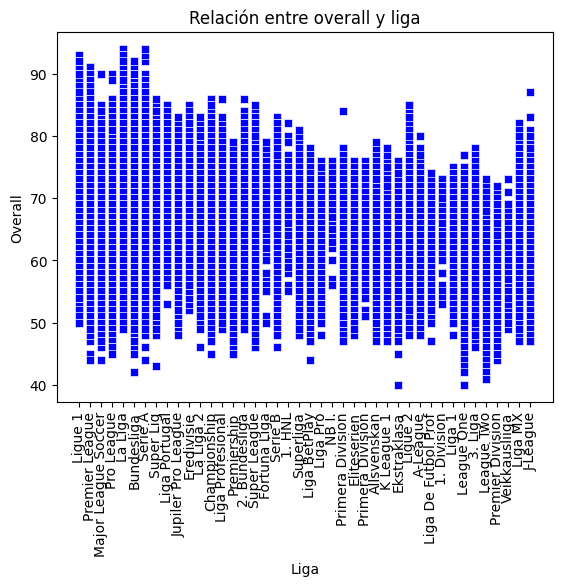

In [44]:
# Crear un scatterplot con Seaborn
sns.scatterplot(x='league_name', y='overall', data=futbol, color='blue', marker=',',)
# Personalizar el gráfico
plt.title('Relación entre overall y liga')
plt.xlabel('Liga')
plt.ylabel('Overall')
# Inclinar las etiquetas del eje x
plt.xticks(rotation=90)  # Ajusta el ángulo a 90 grados
# Mostrar el gráfico
plt.show()

Analizamos las relaciones de las variables principales y las variables tecnicas.

<Axes: title={'center': 'Matriz de Correlación variables FIFA'}>

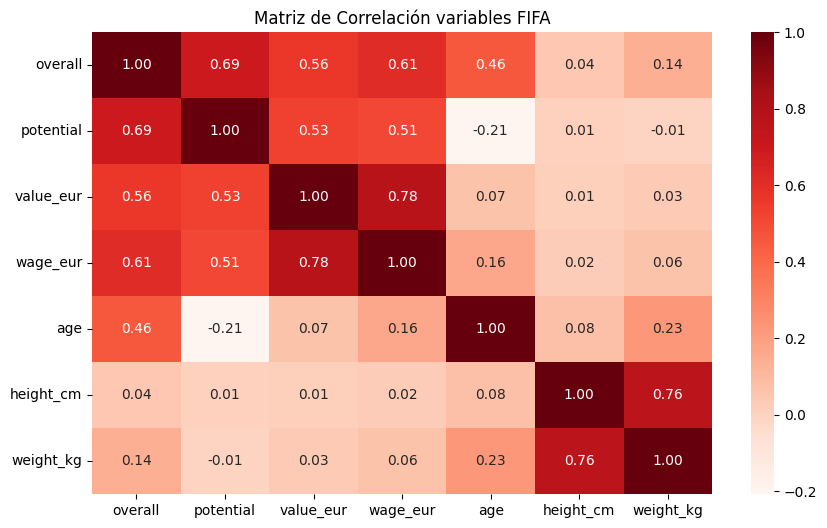

In [45]:
# Calcular la matriz de correlación
correlacion = correlacion_futbol.corr()

# Crear la figura y el mapa de calor
plt.figure(figsize=(10, 6))
plt.title('Matriz de Correlación variables FIFA')
sns.heatmap(correlacion, annot=True, cmap="Reds", fmt=".2f")

Detectamos una correlacion entre las variables overall y potencial,salario,valor en euros y edad.

Analizamos las relaciones entre las variables principales para las promesas.

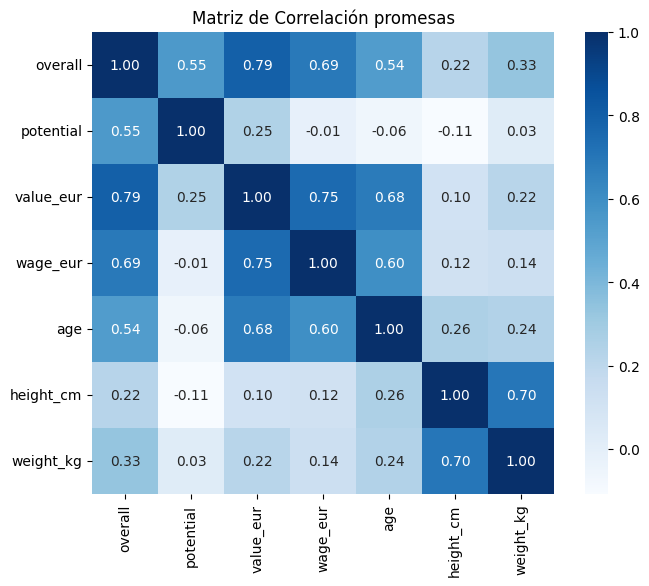

In [46]:
# Calcular la matriz de correlación
correlation_matrix = correlacion_star_promesas.corr()

# Crear gráfica de matriz de correlación con Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt='.2f', square=True)
plt.title('Matriz de Correlación promesas')
plt.show()

Detectamos una correlacion entre las variables overall y valor,salario,potencial y edad, tambien se observa una correlacion negativa entre el potencial y el salario.

Analizamos la relacion entre el valor de mercado y el salario.

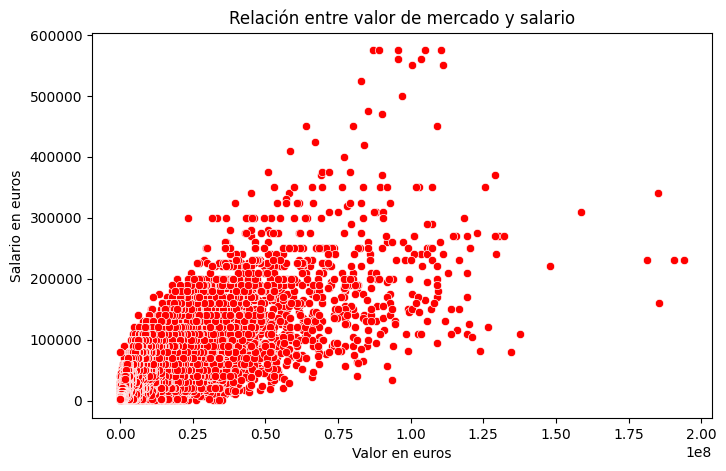

In [47]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=futbol["value_eur"], y=futbol["wage_eur"], color="Red")
plt.title("Relación entre valor de mercado y salario")
plt.xlabel("Valor en euros")
plt.ylabel("Salario en euros")
plt.show()

Observamos que hay jugadores con un valor medio que tienen los salarios mas altos, mientras que otros con mayor valor tienen salarios mas bajos.

Analizamos la relacion entre el valor de mercado y el overall.

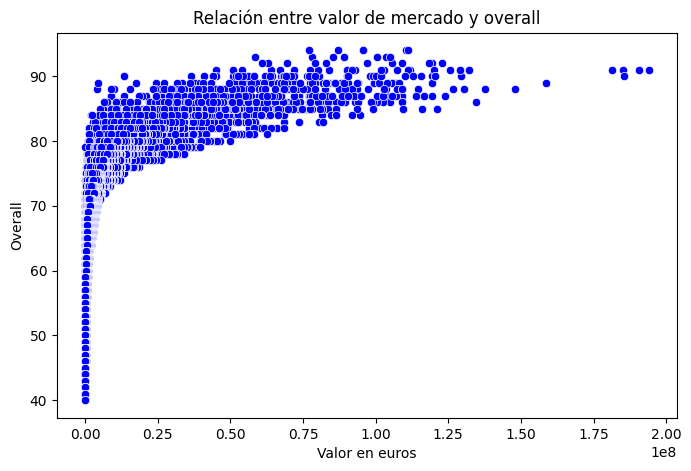

In [48]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=futbol["value_eur"], y=futbol["overall"], color="Blue")
plt.title("Relación entre valor de mercado y overall")
plt.xlabel("Valor en euros")
plt.ylabel("Overall")
plt.show()

Analizamos los salarios medios por juego FIFA

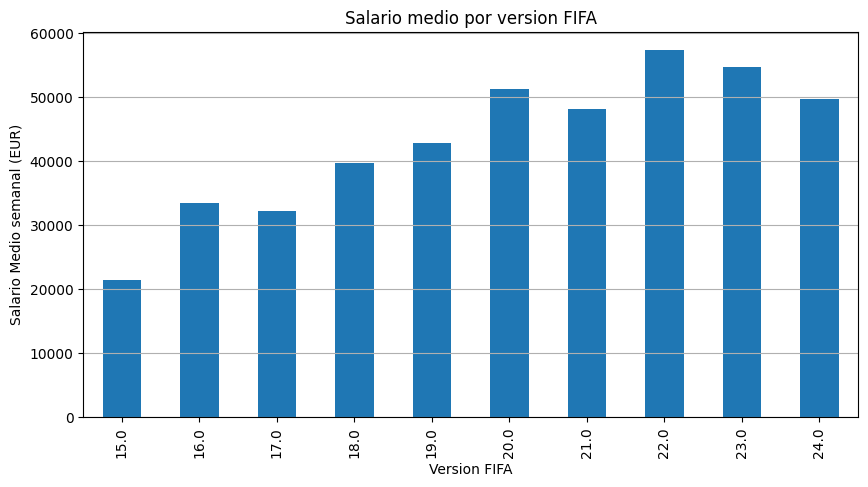

In [49]:

top_promesas.groupby("fifa_version")["wage_eur"].mean().plot(kind="bar", figsize=(10, 5))
plt.xlabel("Version FIFA")
plt.ylabel("Salario Medio semanal (EUR)")
plt.title("Salario medio por version FIFA")
plt.grid(axis="y")
plt.show()

Destaca que aumentan pero han descendido desde 2022.

El valor de los jugadores ha descendido desde 2021.

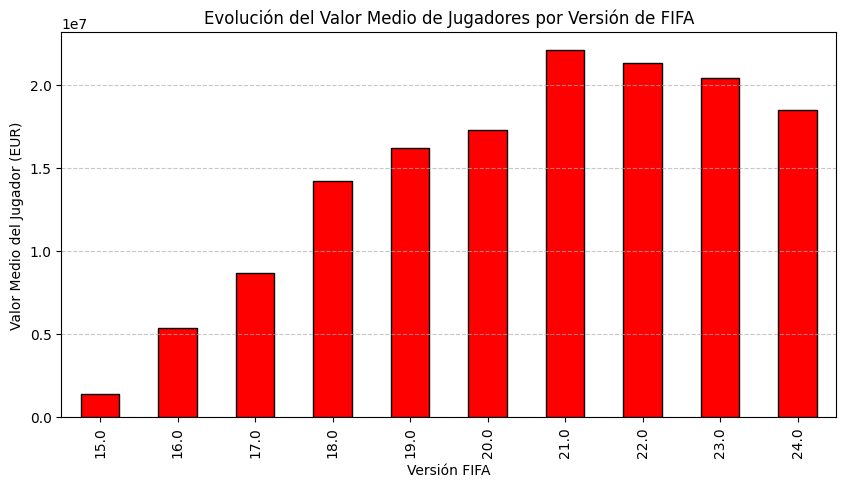

In [51]:
# Agrupar por versión de FIFA y calcular el valor medio de los jugadores
avg_value = top_promesas.groupby("fifa_version")["value_eur"].mean()

# Crear la visualización con mejoras estéticas
plt.figure(figsize=(10, 5))
avg_value.plot(kind="bar", color="Red", edgecolor="black")

# Etiquetas y título con mejor claridad
plt.xlabel("Versión FIFA")
plt.ylabel("Valor Medio del Jugador (EUR)")
plt.title("Evolución del Valor Medio de Jugadores por Versión de FIFA")
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

Analizamos los aspectos tecnicos del juego como son el pase, el regate y la defensa de las promesas.

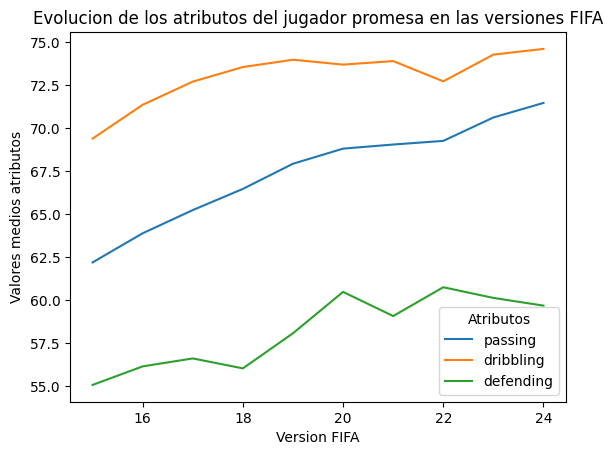

In [ ]:
top_promesas.groupby("fifa_version")[["passing","dribbling","defending"]].mean().plot()
plt.xlabel("Version FIFA")
plt.ylabel("Valores medios atributos")
plt.title("Evolucion de los atributos del jugador promesa en las versiones FIFA")
plt.legend(title="Atributos")
plt.show()

Tienen una tendencia ascendente como caracteristicas mas importantes en el overall de un jugador.

Analizamos el pase,regate y defensa de los fifa.

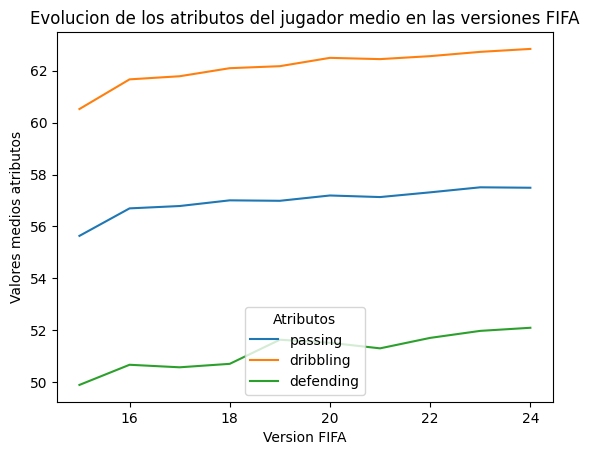

In [ ]:
futbol.groupby("fifa_version")[["passing","dribbling","defending"]].mean().plot()
plt.xlabel("Version FIFA")
plt.ylabel("Valores medios atributos")
plt.title("Evolucion de los atributos del jugador medio en las versiones FIFA")
plt.legend(title="Atributos",loc="best")
plt.show()

# 6. Visualizaciones

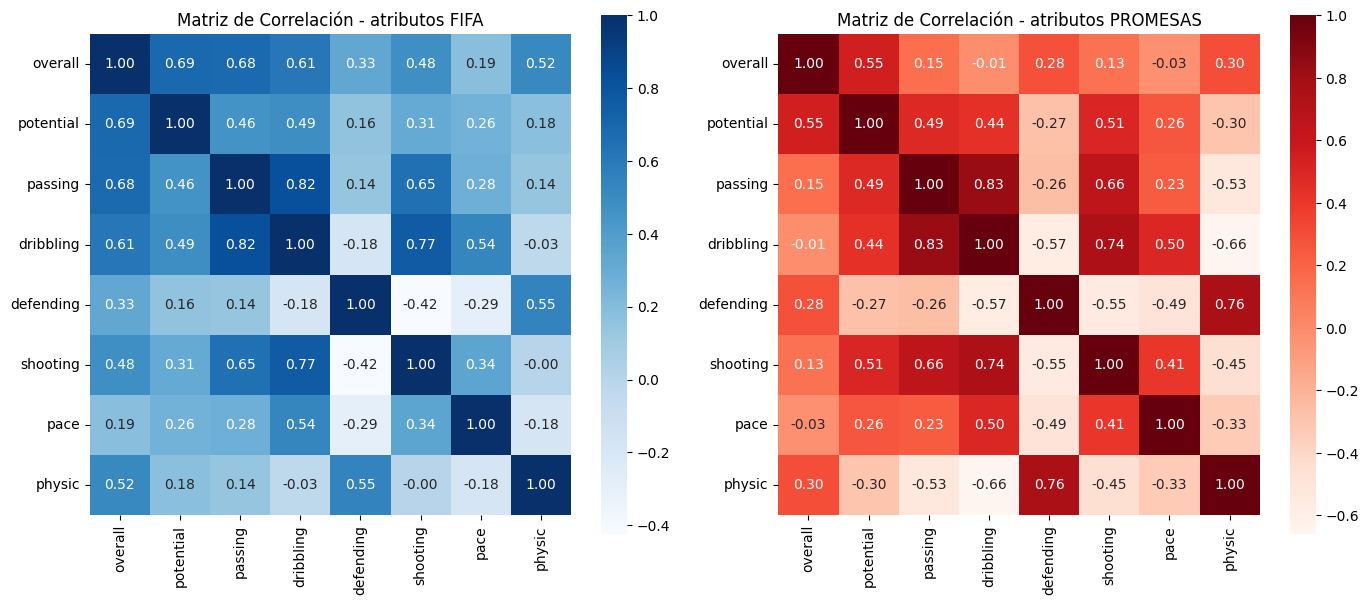

In [67]:
# Supongamos que tienes dos DataFrames con atributos de FIFA
correlation_matrix_1 = correlacion_futbol_tecnica_fifa.corr()
correlation_matrix_2 = correlacion_futbol_tecnica_promesas.corr()

# Crear la figura y los subgráficos
fig, axes = plt.subplots(1, 2, figsize=(14, 6))  # 1 fila, 2 columnas

# Primera matriz de correlación
sns.heatmap(correlation_matrix_1, annot=True, cmap='Blues', fmt='.2f', square=True, ax=axes[0])
axes[0].set_title('Matriz de Correlación - atributos FIFA')

# Segunda matriz de correlación
sns.heatmap(correlation_matrix_2, annot=True, cmap='Reds', fmt='.2f', square=True, ax=axes[1])
axes[1].set_title('Matriz de Correlación - atributos PROMESAS')

# Mostrar la figura
plt.tight_layout()
plt.show()

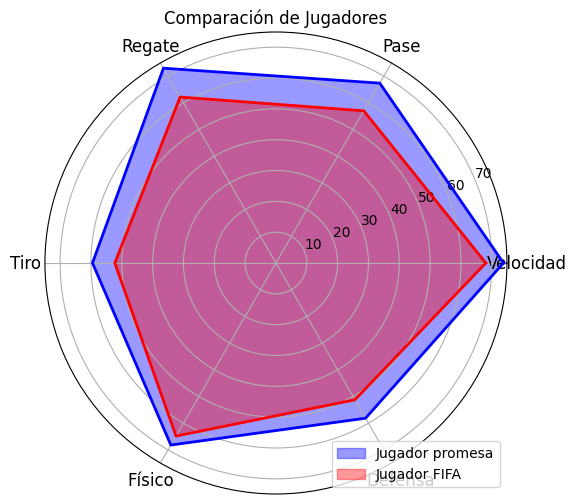

In [ ]:
# Datos de ejemplo: atributos de dos jugadores
labels = ["Velocidad", "Pase", "Regate", "Tiro", "Físico", "Defensa"]
player1 = [top_promesas["pace"].mean(),top_promesas["passing"].mean(), top_promesas["dribbling"].mean(),
            top_promesas["shooting"].mean(), top_promesas["physic"].mean(), top_promesas["defending"].mean()]  # Jugador 1
player2 = [futbol["pace"].mean(),futbol["passing"].mean(), futbol["dribbling"].mean(),
            futbol["shooting"].mean(),futbol["physic"].mean(), futbol["defending"].mean()]  # Jugador 2

# Configuración del gráfico
angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False)

# Cerrar el gráfico conectando el último punto con el primero
player1 = np.append(player1, player1[0])
player2 = np.append(player2, player2[0])
angles = np.append(angles, angles[0])

# Crear la figura y el eje polar
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

# Graficar los datos de los jugadores
ax.fill(angles, player1, color="blue", alpha=0.4, label="Jugador promesa")
ax.plot(angles, player1, color="blue", linewidth=2)

ax.fill(angles, player2, color="red", alpha=0.4, label="Jugador FIFA")
ax.plot(angles, player2, color="red", linewidth=2)

# Agregar etiquetas y leyenda
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels, fontsize=12)
ax.legend(loc="best")

# Mostrar el gráfico
plt.title("Comparación de Jugadores")
plt.show()

# 7. Hallazgos y Conclusiones
- El FIFA es una buena herramienta para segmentar jugadores y ahorrar asi tiempo y dinero.
- Existen jugadores valiosos que no cobran los que mas.
- Existen jugadores que no son los mas valiosos pero cobran los que mas.
- Las promesas tienen distintas correlaciones que la media de los jugadores FIFA.
- Los jugadores zurdos aparecen en gran numero entre las promesas.
- La evolucion del overall de las promesas es la esperada, no asi la de su potencial el cual es una sorpresa.

# 8. Limitaciones y Recomendaciones


El metodo es limitado por cuanto no proporciona un modelo predictivo de la capacidad de cada jugador, aunque los resultados son esperanzadores.